## Importing Libraries

In [2]:
import pyscreenshot as ImageGrab
import time
import cv2
import csv
import glob
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

## Capturing the images

In [3]:
images_folder="captured_images/0/"
def one_time():
    for i in range(0,100):
        time.sleep(8)
        im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
        print("saved......",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now........")

## Generate dataset

In [4]:
# header  =["label"]
# for i in range(0,784):
#    header.append("pixel"+str(i))
# with open('dataset.csv', 'a') as f:
#    writer = csv.writer(f)
#    writer.writerow(header)
    
# for label in range(10):
#    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
#    for img_path in dirList:
#        im= cv2.imread(img_path)
#        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
#        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
#        data=[]
#        data.append(label)
#        rows, cols = roi.shape
        
#        ## Fill the data array with pixels one by one.
#        for i in range(rows):
#            for j in range(cols):
#                k =roi[i,j]
#                if k>100:
#                    k=1
#                else:
#                    k=0
#                data.append(k)
#        with open('dataset.csv', 'a') as f:
#            writer = csv.writer(f)
#            writer.writerow(data)

In [5]:
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

    label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
562     9      0      0      0      0      0      0      0      0      0  ...   
372     5      0      0      0      0      0      0      0      0      0  ...   
65      1      0      0      0      0      0      0      0      0      0  ...   
615     9      0      0      0      0      0      0      0      0      0  ...   
607     9      0      0      0      0      0      0      0      0      0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
412     6      0      0      0      0      0      0      0      0      0  ...   
398     6      0      0      0      0      0      0      0      0      0  ...   
479     7      0      0      0      0      0      0      0      0      0  ...   
481     7      0      0      0      0      0      0      0      0      0  ...   
217     3      0      0      0      0      0      0      0      0      0  ...   

    pixel774 pixel775 pixel

In [6]:
X = data.drop(["label"],axis=1)
Y= data["label"]

5
Data type: object
Shape: (28, 28)


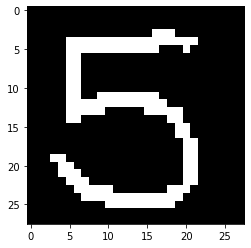

In [7]:
idx =345

img = X.loc[idx].values.reshape(28,28)
print(Y[idx])

print("Data type:", img.dtype)
print("Shape:", img.shape)

img = img.astype(float)  

plt.imshow(img, cmap='gray')  
plt.show()

In [8]:
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [20]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((496, 784), (124, 784), (496,), (124,))

In [10]:
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "digit_recognizer")

['digit_recognizer']

In [21]:
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

ValueError: could not convert string to float: 'pixel0'

## Prediction of image drawn in paint

In [15]:
model=joblib.load("digit_recognizer")
images_folder="imgs/"
  
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: 
       break
cv2.destroyAllWindows()

c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


c:\Users\kareem\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


KeyboardInterrupt: 